In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
oil = pd.read_csv("/content/oil.csv")
stores = pd.read_csv("/content/stores.csv")
transactions = pd.read_csv("/content/transactions.csv")
holidays = pd.read_csv("/content/holidays_events.csv")

In [347]:
df1 = pd.merge(train, oil, on='date', how='left')
df2 = pd.merge(df1, transactions, on=['date', 'store_nbr'], how='left')
df3 = pd.merge(df2, stores, on='store_nbr', how='left')

df3.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13


In [348]:
df4 = pd.merge(df3, holidays, on='date', how='left')

In [349]:
df = df4

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81886 entries, 0 to 81885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            81886 non-null  int64  
 1   date          81886 non-null  object 
 2   store_nbr     81886 non-null  int64  
 3   family        81886 non-null  object 
 4   sales         81886 non-null  float64
 5   onpromotion   81885 non-null  float64
 6   dcoilwtico    56938 non-null  float64
 7   transactions  68257 non-null  float64
 8   city          81886 non-null  object 
 9   state         81886 non-null  object 
 10  type          81886 non-null  object 
 11  cluster       81886 non-null  int64  
 12  description   8910 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.1+ MB


In [351]:
df.shape

(81886, 13)

In [352]:
df.info()
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81886 entries, 0 to 81885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            81886 non-null  int64  
 1   date          81886 non-null  object 
 2   store_nbr     81886 non-null  int64  
 3   family        81886 non-null  object 
 4   sales         81886 non-null  float64
 5   onpromotion   81885 non-null  float64
 6   dcoilwtico    56938 non-null  float64
 7   transactions  68257 non-null  float64
 8   city          81886 non-null  object 
 9   state         81886 non-null  object 
 10  type          81886 non-null  object 
 11  cluster       81886 non-null  int64  
 12  description   8910 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.1+ MB


,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster
count,81886.00,81886.00,81886.00,81885.00,56938.00,68257.00,81886.00
mean,40942.50,27.52,190.05,0.00,95.41,1677.52,8.48
std,23638.60,15.58,648.71,0.00,1.61,907.52,4.65
min,0.00,1.00,0.00,0.00,92.97,374.00,1.00
25%,20471.25,14.00,0.00,0.00,93.60,1039.00,4.00
50%,40942.50,28.00,0.00,0.00,95.61,1390.00,9.00
75%,61413.75,41.00,83.00,0.00,97.01,2129.00,13.00
max,81885.00,54.00,26067.00,0.00,97.98,5401.00,17.00


In [355]:
holidays = pd.read_csv("/content/holidays_events.csv")
holidays.head()


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [356]:
holidays = holidays[holidays.transferred != True]
holidays = holidays[holidays.locale == 'National']

holidays = holidays.drop(columns=['type', 'locale', 'locale_name', 'transferred'])

In [357]:
df4 = pd.merge(df3, holidays, on='date', how='left')
df4.rename(columns={'description' : 'holiday'}, inplace=True)

df = df4
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano


In [359]:


# review new df

df.info()
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81886 entries, 0 to 81885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            81886 non-null  int64  
 1   date          81886 non-null  object 
 2   store_nbr     81886 non-null  int64  
 3   family        81886 non-null  object 
 4   sales         81886 non-null  float64
 5   onpromotion   81885 non-null  float64
 6   dcoilwtico    56938 non-null  float64
 7   transactions  68257 non-null  float64
 8   city          81886 non-null  object 
 9   state         81886 non-null  object 
 10  type          81886 non-null  object 
 11  cluster       81886 non-null  int64  
 12  holiday       8910 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.1+ MB


,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster
count,81886.00,81886.00,81886.00,81885.00,56938.00,68257.00,81886.00
mean,40942.50,27.52,190.05,0.00,95.41,1677.52,8.48
std,23638.60,15.58,648.71,0.00,1.61,907.52,4.65
min,0.00,1.00,0.00,0.00,92.97,374.00,1.00
25%,20471.25,14.00,0.00,0.00,93.60,1039.00,4.00
50%,40942.50,28.00,0.00,0.00,95.61,1390.00,9.00
75%,61413.75,41.00,83.00,0.00,97.01,2129.00,13.00
max,81885.00,54.00,26067.00,0.00,97.98,5401.00,17.00


In [360]:
df.isna().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         1
dcoilwtico      24948
transactions    13629
city                0
state               0
type                0
cluster             0
holiday         72976
dtype: int64

In [361]:
def nulls(x):
  if x.isna().sum() >=1:
    return x.interpolate().ffill().bfill()
  else:
    return x.ffill().bfill()


In [362]:
df["dcoilwtico"] = nulls(df["dcoilwtico"])

In [363]:
df.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         1
dcoilwtico          0
transactions    13629
city                0
state               0
type                0
cluster             0
holiday         72976
dtype: int64

In [364]:
def date(x):
    x['date'] = pd.to_datetime(x['date'])

    x['year'] = x['date'].dt.year
    x['month'] = x['date'].dt.month
    x['day'] = x['date'].dt.day
    x['day_name'] = x['date'].dt.day_name()
    return x

df = date(df)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday


In [365]:
df1 = df.sample(n = 3000).reset_index()

<Axes: xlabel='date', ylabel='sales'>

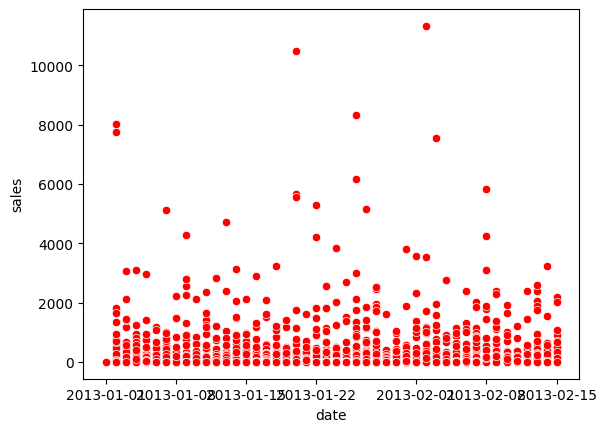

In [366]:
sns.scatterplot(df1 ,x ="date" , y = "sales" , c = "red")

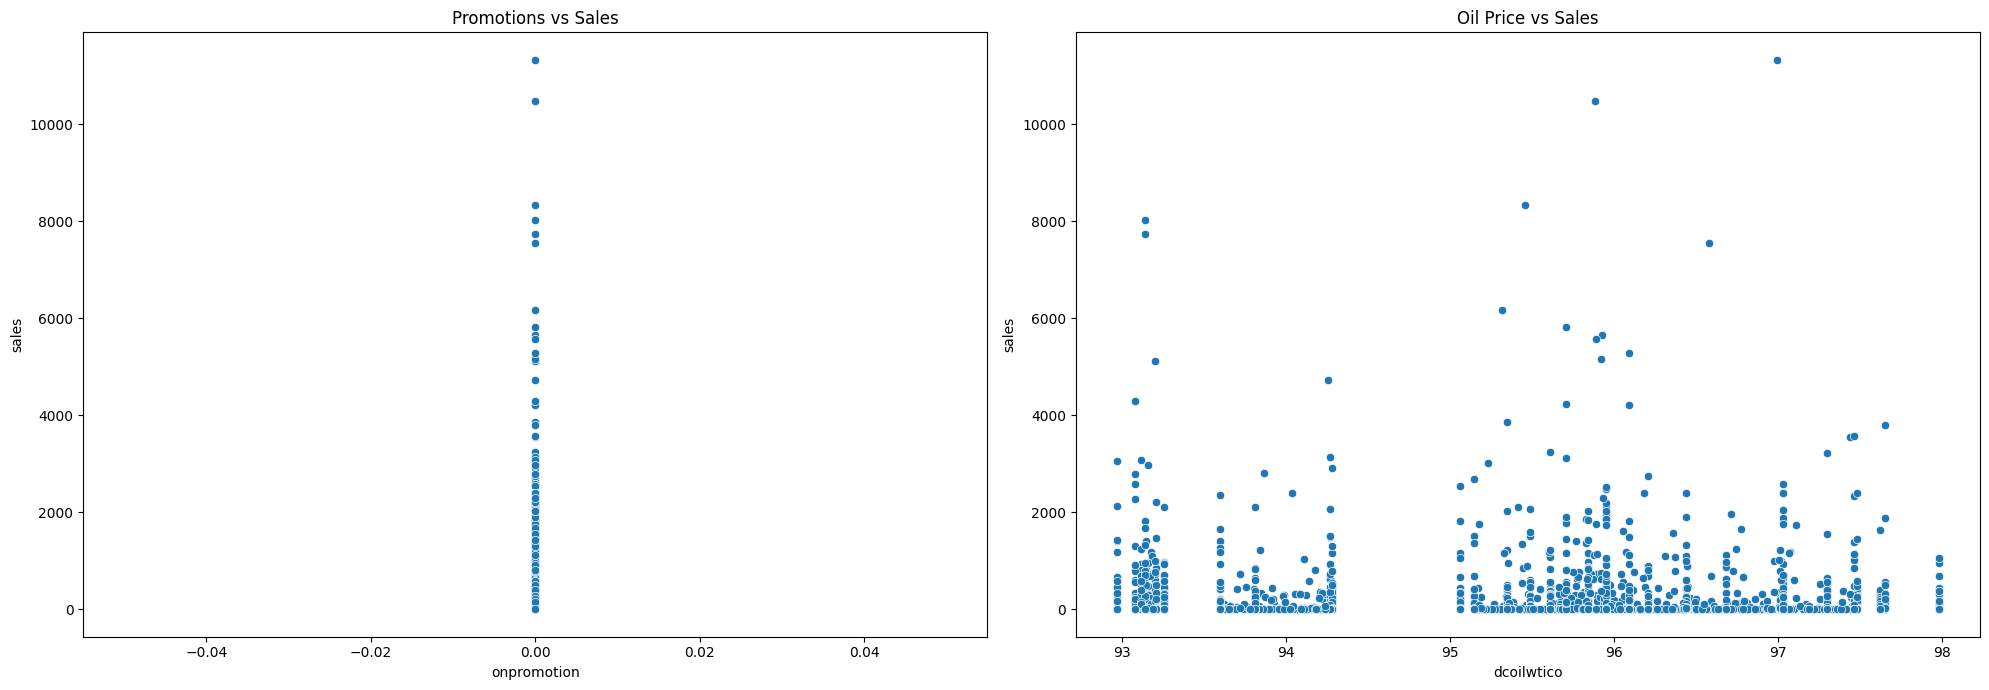

In [367]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))

sns.scatterplot(data=df1, x='onpromotion', y='sales', ax=axs[0])
ax = sns.scatterplot(data=df1, x='dcoilwtico', y='sales', ax=axs[1])

axs[0].set_title('Promotions vs Sales')
axs[1].set_title('Oil Price vs Sales')

plt.tight_layout()
plt.show()

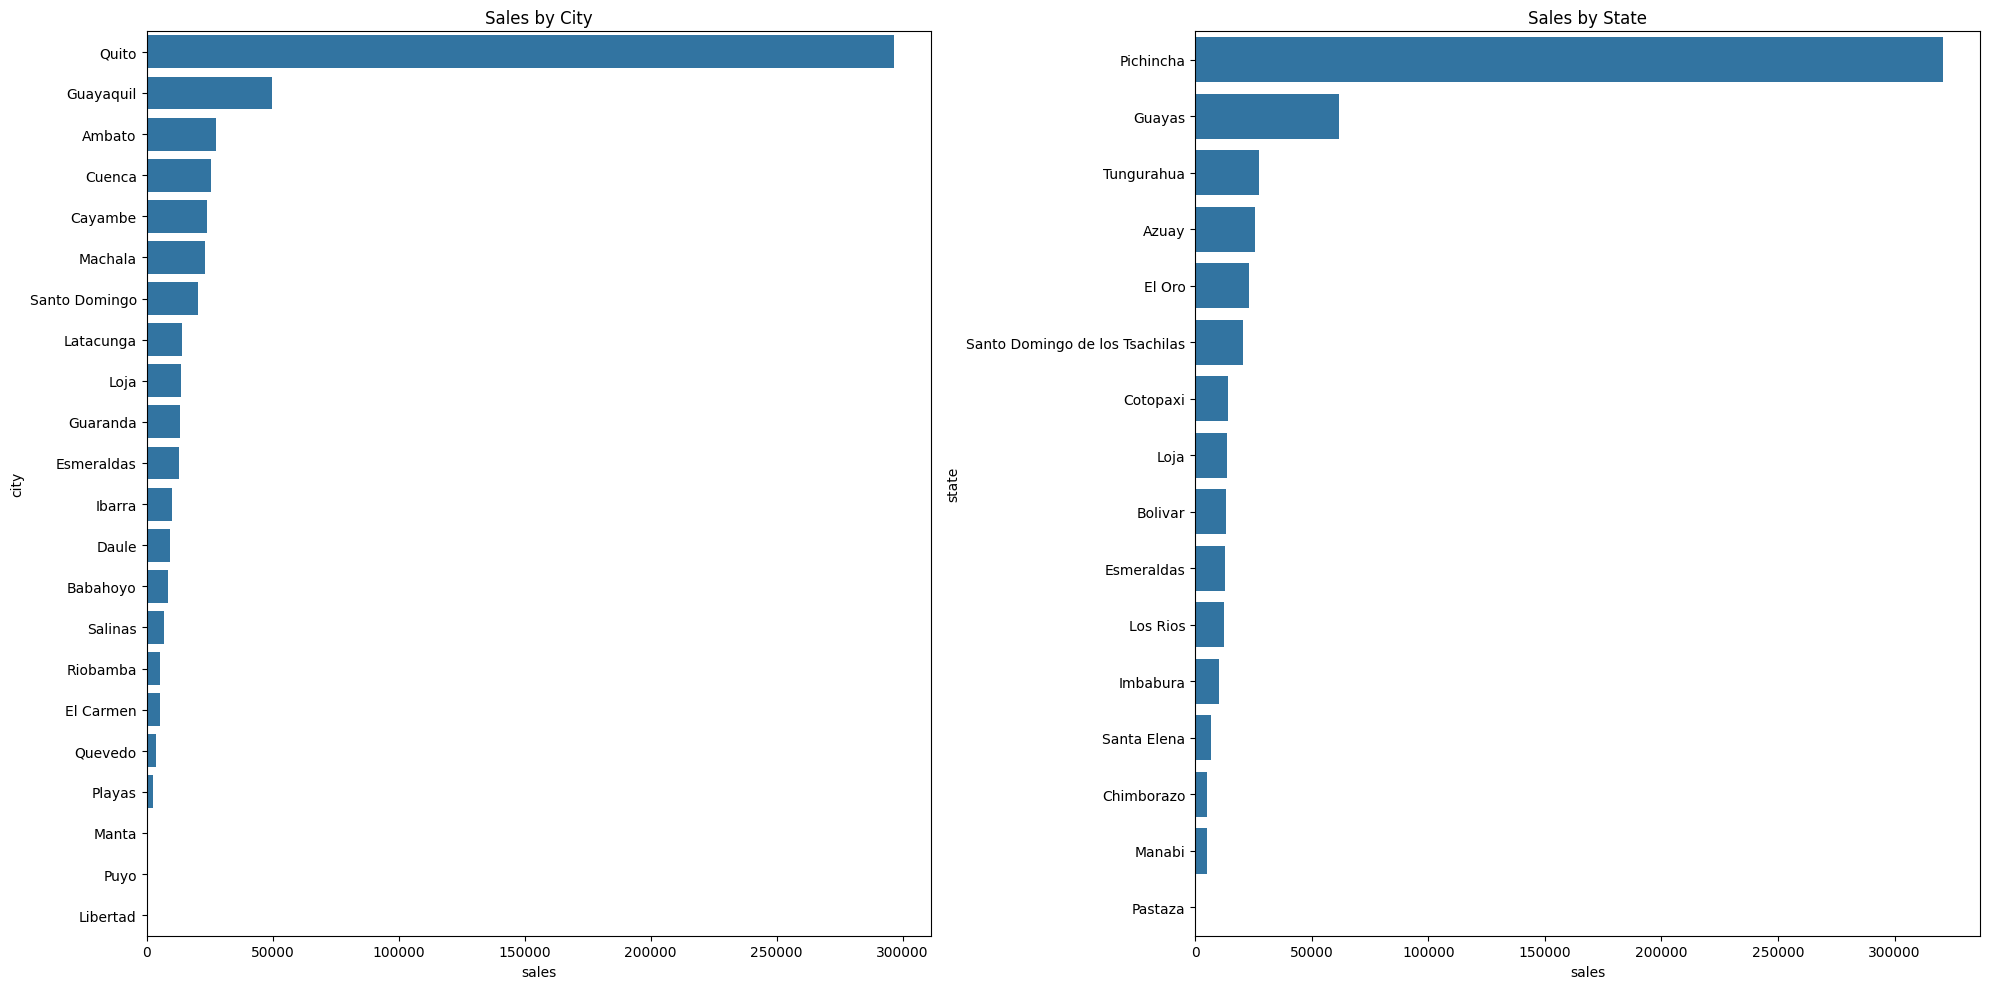

In [368]:

fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(x='sales', y='city', data=df1.groupby('city')['sales'].sum().reset_index().sort_values('sales', ascending = False), ax=axs[0])
sns.barplot(x='sales', y='state', data=df1.groupby('state')['sales'].sum().reset_index().sort_values('sales', ascending = False), ax=axs[1])

axs[0].set_title('Sales by City')
axs[1].set_title('Sales by State')

plt.tight_layout()
plt.show()

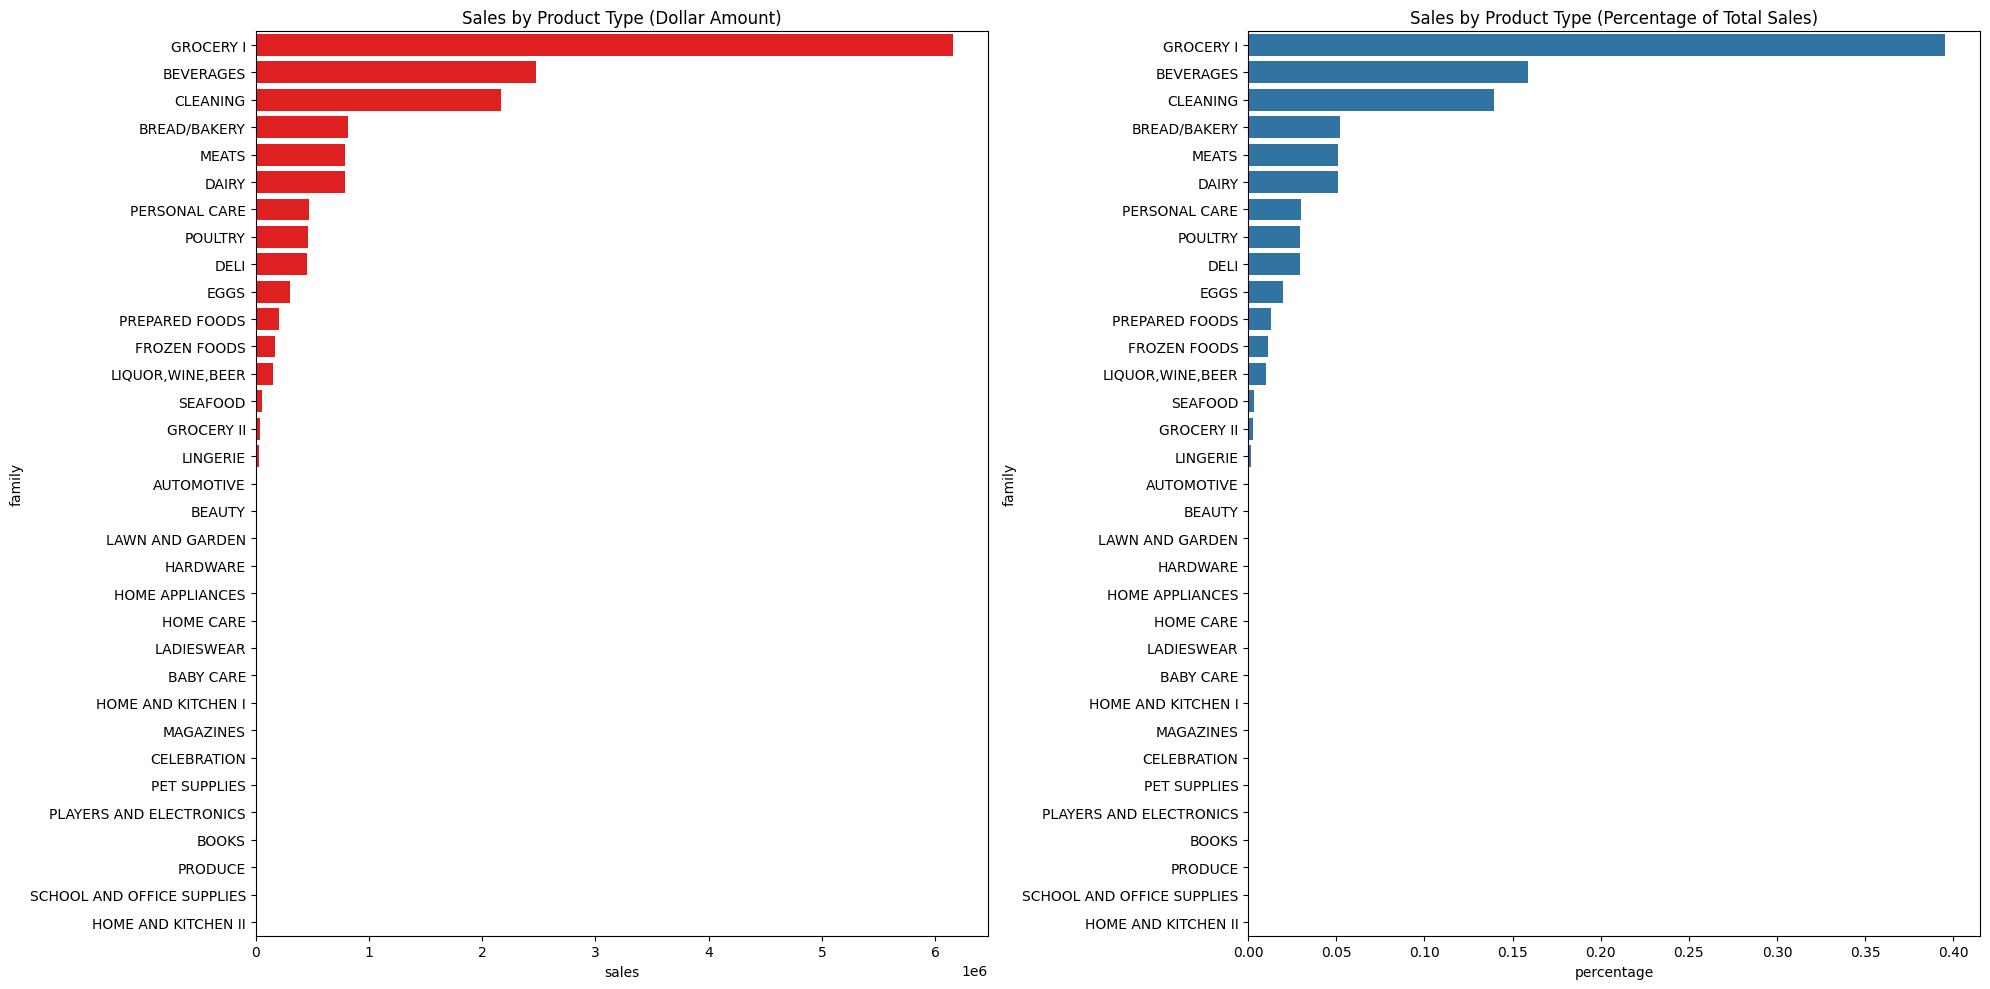

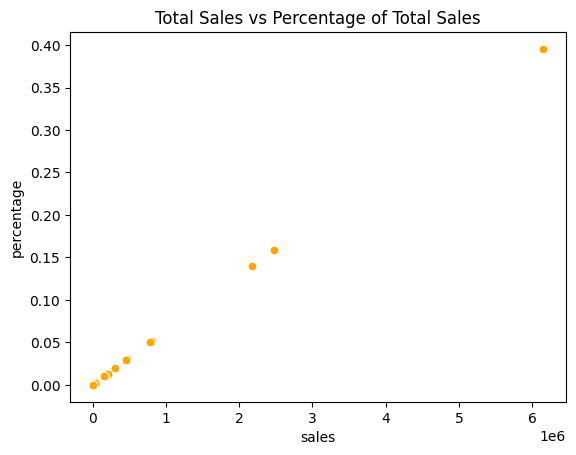

In [369]:
familypivot = pd.DataFrame()
familypivot = df.groupby(by='family')['sales'].sum().sort_values(ascending=False).reset_index()
familypivot.head()

# then evaluate by percentage of sales

total = familypivot['sales'].sum()
familypivot['percentage']=(familypivot['sales']/total)

familypivot.head()
fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(data=familypivot, x='sales', y='family', ax=axs[0] , color = "red")
sns.barplot(data=familypivot, x='percentage', y='family', ax=axs[1])

axs[0].set_title('Sales by Product Type (Dollar Amount)')
axs[1].set_title('Sales by Product Type (Percentage of Total Sales)')

plt.tight_layout()
plt.show()
ax = sns.scatterplot(data=familypivot, x='sales', y='percentage' , color = "orange")
ax.set_title('Total Sales vs Percentage of Total Sales')

plt.show()

In [370]:
family_map       = {'AUTOMOTIVE': 'rest',
                   'BABY CARE': 'rest',
                   'BEAUTY': 'rest',
                   'BOOKS': 'rest',
                   'CELEBRATION': 'rest',
                   'GROCERY II': 'rest',
                   'HARDWARE': 'rest',
                   'HOME AND KITCHEN I': 'rest',
                   'HOME AND KITCHEN II': 'rest',
                   'HOME APPLIANCES': 'rest',
                   'LADIESWEAR': 'rest',
                   'LAWN AND GARDEN': 'rest',
                   'LINGERIE': 'rest',
                   'MAGAZINES': 'rest',
                   'PET SUPPLIES': 'rest',
                   'PLAYERS AND ELECTRONICS': 'rest',
                   'SCHOOL AND OFFICE SUPPLIES': 'rest',
                   'SEAFOOD': 'rest',
                   'DELI': 'fifth',
                    'EGGS': 'sixth',
                    'FROZEN FOODS': 'sixth',
                    'HOME CARE': 'sixth',
                    'LIQUOR,WINE,BEER': 'sixth',
                    'PREPARED FOODS': 'sixth',
                    'PERSONAL CARE': 'fifth',
                    'BREAD/BAKERY': 'fourth',
                    'MEATS': 'fifth',
                    'POULTRY': 'third',
                    'CLEANING':'third',
                    'DAIRY':'fourth',
                    'PRODUCE':'third',
                    'BEVERAGES':'second',
                    'GROCERY I': 'first'
                   }

df['new_family'] = df['family'].map(family_map)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,BABY CARE,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,BEAUTY,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,BOOKS,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [371]:

df2 = df.drop(columns=['family'])
df2.head()


,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0.0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [372]:
from sklearn.model_selection import train_test_split

In [373]:
X = df2.drop(columns = "sales")
Y = df2["sales"]

In [374]:
types = X.select_dtypes(exclude=np.number).columns.tolist()

for col in types:
    X[col] = X[col].astype('category')

X.dtypes

id                 int64
date            category
store_nbr          int64
onpromotion      float64
dcoilwtico       float64
transactions     float64
city            category
state           category
type            category
cluster            int64
holiday         category
year               int32
month              int32
day                int32
day_name        category
new_family      category
dtype: object

In [375]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2 , test_size = 0.2)

import xgboost as xgb

df_train = xgb.DMatrix(X_train, Y_train, enable_categorical=True)
df_test = xgb.DMatrix(X_test, Y_test, enable_categorical=True)

In [376]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
params = {"objective": "reg:squarederror"}
evals = [(df_train, "train"), (df_test, "validation")]
n = 5000

model = xgb.train(
   params=params,
   dtrain=df_train,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250, # every 250 rounds
   early_stopping_rounds=50 # stop the training if validation loss doesn't improve for 50 consecutive rounds
)

preds = model.predict(df_test)


rmse = mean_squared_error(Y_test, preds, squared=False)


print(f"RMSE: {rmse:.3f}")

[0]	train-rmse:491.92156	validation-rmse:452.38719
[62]	train-rmse:155.64245	validation-rmse:217.49983
RMSE: 217.500


In [377]:
test = pd.read_csv("/content/test.csv")

In [378]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [379]:
def replace_non_null(x):
    x.loc[x['holiday'].notnull(), 'holiday'] = 'yes'
    return x

df2 = replace_non_null(df2)

In [380]:
merge1 = pd.merge(test, oil, on='date', how='left')
merge2 = pd.merge(merge1, transactions, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, stores, on='store_nbr', how='left')

merge4 = pd.merge(merge3, holidays, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

test = merge4

# adding oil prices and date features

test['dcoilwtico'] = nulls(test['dcoilwtico'])
test = date(test)


# replace family

test['new_family'] = test['family'].map(family_map)
test = test.drop(columns=['family'])

# replace holidays with yes or null

test = replace_non_null(test)

test.head()


,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest


In [382]:
cats = test.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    test[col] = test[col].astype('category')

In [383]:
test.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest


In [384]:
test_matrix = xgb.DMatrix(test, enable_categorical=True)
predictions = model.predict(test_matrix)
test['sales'] = predictions

# change any negative predictions to zero

test['sales'] = test['sales'].clip(lower=0)

In [385]:
test = test.drop(columns=['date', 'store_nbr', 'onpromotion', 'dcoilwtico', 'transactions',
       'city', 'state', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'day_name', 'new_family'])

test.head()


,id,sales
0,3000888,2.826168
1,3000889,2.826168
2,3000890,145.416977
3,3000891,97.752686
4,3000892,2.826168


In [386]:
test.to_csv('submission.csv', index=False)
